# Trabajo final Julio Tognetti

## Imports
Se importan las librerias necesarias para el proyecto

In [1]:
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate,GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold,StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score
from sklearn.preprocessing import LabelBinarizer,RobustScaler,StandardScaler
import imblearn
from collections import Counter
from statistics import mean, stdev
plt.rcParams["figure.figsize"] = 16, 5
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#sns.set_context("talk")
sns.set_palette('rocket')

Se carga el data set y se visualizan los primeros y ultimos registros

In [2]:
vinos = pd.read_csv('winequality-red.csv')
vinos

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
vinos.shape

(1599, 12)

In [4]:
vinos.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
vinos.isnull().values.any()

False

Podemos observar que el data set no tiene null's y todos sus atributos son numericos.

viendo la distribucion de las clases objetivo se puede observar que no estan balanceadas ya que existen pocos vinos con calidad (3,4,7,8) en comparacion a los vinos de calidad (5,6)

<AxesSubplot:xlabel='quality', ylabel='count'>

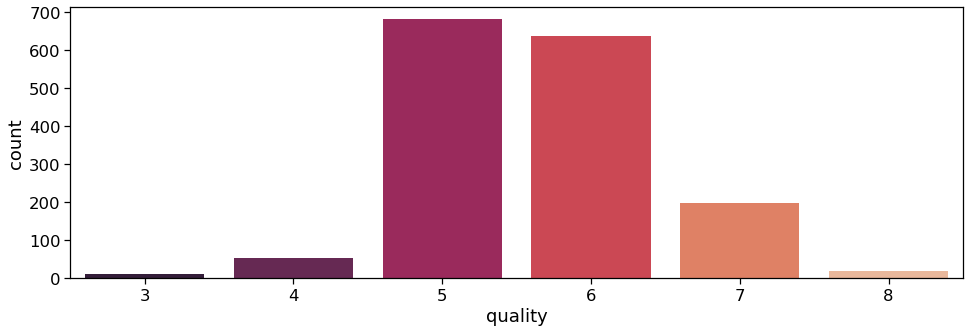

In [7]:
sns.countplot(x='quality',data=vinos)

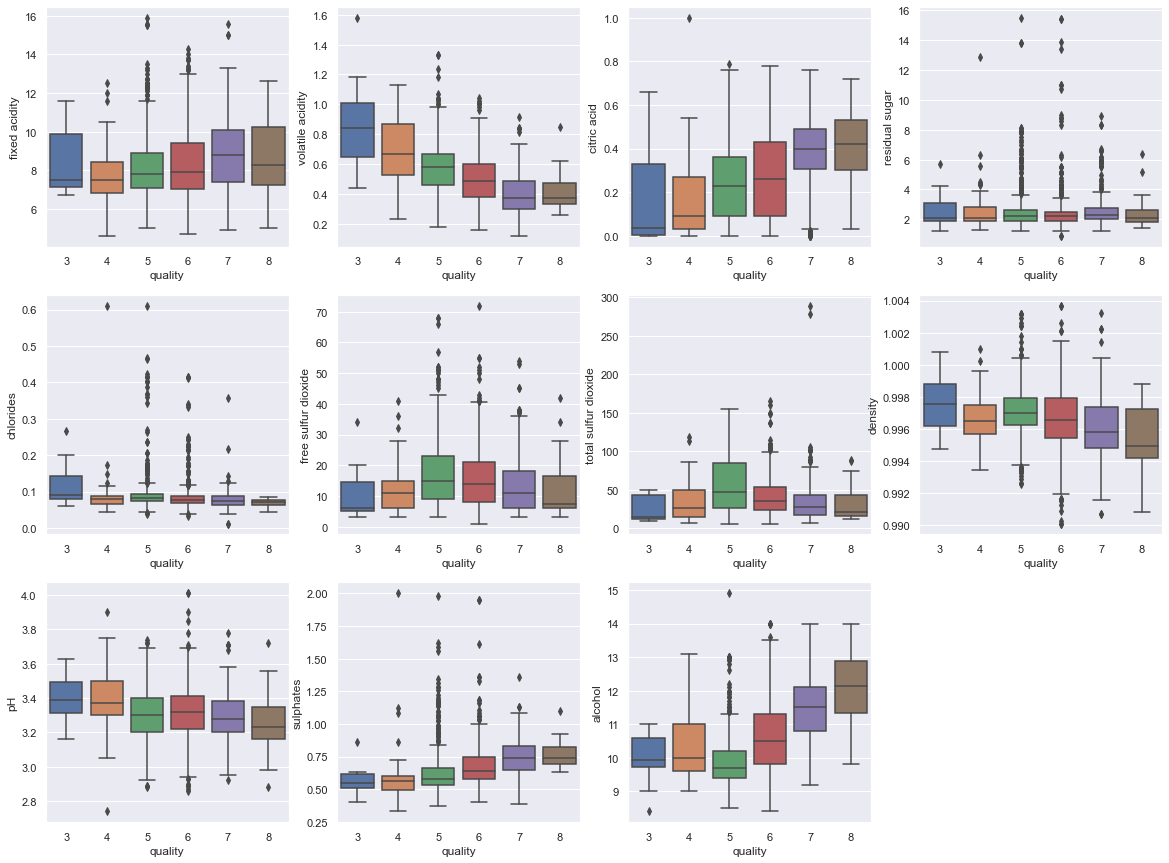

In [8]:
sns.set(rc={'figure.figsize':(20,15)})

for i, column in enumerate(vinos.columns, 1):
    if (column != 'quality'):
        plt.subplot(3,4,i)
        sns.boxplot(x='quality',y=column, data=vinos)



De los boxplot podemos observar que tenemos presencia de outliers que seran tratado en las siguientes corridas del modelo.

Tambien podemos observar que 
- El volatile acidity (acidez volatil) se encuentra menos presente en vinos con mayor calidad, esto es ya que, altas concentraciones del mismo dan un gusto avinagrado a los vinos
- Hay mayor cantidad de acido citrico en vinos de mayor calidad
- la graduacion alcohlica es mas alta en vinos de mayor calidad
 


<AxesSubplot:>

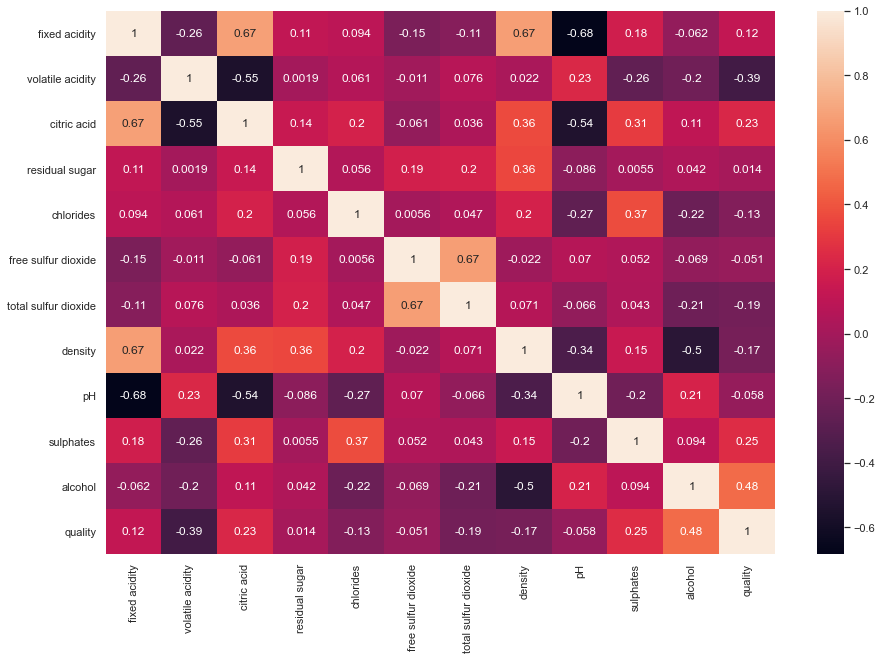

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(vinos.corr(),annot=True)

## Run 1 Default
Para las consecutivas ejecuciones se utilizara un modelo KNN para realizar la clasificacion.

Se ejecuta el modelo base, sin mucha atencion a los problemas antes mencionados.

In [10]:
X1=vinos.drop(['quality',],axis=1)
Y1=vinos['quality']
train_x,test_x, train_y,test_y = train_test_split(X1,Y1, test_size=0.2, random_state=42)

In [11]:
knn = KNeighborsClassifier(metric='manhattan')
knn.fit(train_x,train_y)
pred_i = knn.predict(test_x)
error_rate = (np.mean(pred_i != test_y))
error_rate

0.4875

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(pred_i,test_y))
print(classification_report(pred_i,test_y))

[[ 0  0  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 1  5 87 53 14  1]
 [ 0  5 38 70 21  3]
 [ 0  0  3  9  7  1]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.67      0.54      0.60       161
           6       0.53      0.51      0.52       137
           7       0.17      0.35      0.23        20
           8       0.00      0.00      0.00         0

    accuracy                           0.51       320
   macro avg       0.23      0.23      0.22       320
weighted avg       0.57      0.51      0.54       320



C:\Users\Julio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Normalizamos

In [13]:
#X1=vinos.drop(['quality',],axis=1)
#Y1=vinos['quality']

scaler = StandardScaler()
Xnorm = scaler.fit_transform(X1)

train_x,test_x, train_y,test_y = train_test_split(Xnorm,Y1, test_size=0.2, random_state=42)

In [14]:
knn = KNeighborsClassifier(metric='manhattan')
knn.fit(train_x,train_y)
pred_i = knn.predict(test_x)
error_rate = (np.mean(pred_i != test_y))
error_rate

0.434375

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(pred_i,test_y))
print(classification_report(pred_i,test_y))

[[ 0  1  0  0  0  0]
 [ 0  0  4  1  1  0]
 [ 0  4 94 48  4  1]
 [ 1  5 32 72 22  0]
 [ 0  0  0 11 15  4]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.62      0.67       151
           6       0.55      0.55      0.55       132
           7       0.36      0.50      0.42        30
           8       0.00      0.00      0.00         0

    accuracy                           0.57       320
   macro avg       0.27      0.28      0.27       320
weighted avg       0.60      0.57      0.58       320



C:\Users\Julio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Run 2 Clases balanceadas
En la ejecucion anterior vemos que hay clases que no fueron representadas lo que genera un precision 0 en esas clases.

En esta corrida Numero 2 solucionaremos este problema.

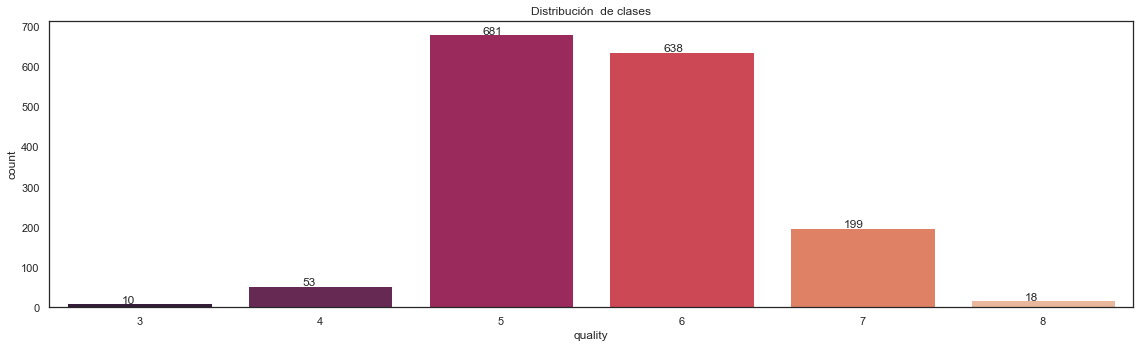

In [18]:
plt.rcParams["figure.figsize"] = 16, 5
sns.set_style("white")
sns.set_palette('rocket')
plot = sns.countplot(x='quality',data=vinos)
plot.set_title("Distribución  de clases")
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()))
plt.tight_layout()

plt.savefig('Distclasestrs.png', transparent=True)

Para afrontar este problema se utilizara el metodo [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) para poder generar de manera sintetica nuevas muestras de las clases minoritarias.


In [23]:
oversample = imblearn.over_sampling.SMOTE()
testX , testY = oversample.fit_resample(Xnorm,Y1)


In [24]:
counter = Counter(testY)
print(counter)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [25]:
train_x,test_x, train_y,test_y = train_test_split(testX,testY, test_size=0.2, random_state=123)


knn = KNeighborsClassifier(metric='manhattan')
knn.fit(train_x,train_y)
pred_i = knn.predict(test_x)
error_rate = (np.mean(pred_i != test_y))

error_rate

0.1882640586797066

In [26]:
print(confusion_matrix(pred_i,test_y))
print(classification_report(pred_i,test_y))

[[135   0   6   3   0   0]
 [  2 129  26  18   0   0]
 [  0   0  77  30   0   0]
 [  0   0  21  57   5   1]
 [  0   3   6  22 123   3]
 [  0   0   0   4   4 143]]
              precision    recall  f1-score   support

           3       0.99      0.94      0.96       144
           4       0.98      0.74      0.84       175
           5       0.57      0.72      0.63       107
           6       0.43      0.68      0.52        84
           7       0.93      0.78      0.85       157
           8       0.97      0.95      0.96       151

    accuracy                           0.81       818
   macro avg       0.81      0.80      0.79       818
weighted avg       0.86      0.81      0.83       818



Como vemos, el accuracy aumento. Pero si vemos el precision de las clases que no fueron sintetizadas (5 y 6) se observa que no tiene mejores resultados, por lo que se procede a utilizar otro metodo para solucionar el desbalanceo de las clases.

#### Divicion Train y Test
Se buscara otra forma de dividir nuestro set de datos
Teniendo en cuenta que las clases estan desbalanceadas se probaran los metodos StratifiedKFold y StratifiedShuffleSplit

StratifiedKFold:
[0.55       0.5625     0.64375    0.51875    0.5875     0.6
 0.54375    0.58125    0.5375     0.56603774]
StratShuffleSplit:
[0.64375 0.60625 0.55    0.5625  0.575   0.6375  0.5625  0.64375 0.6375
 0.61875]


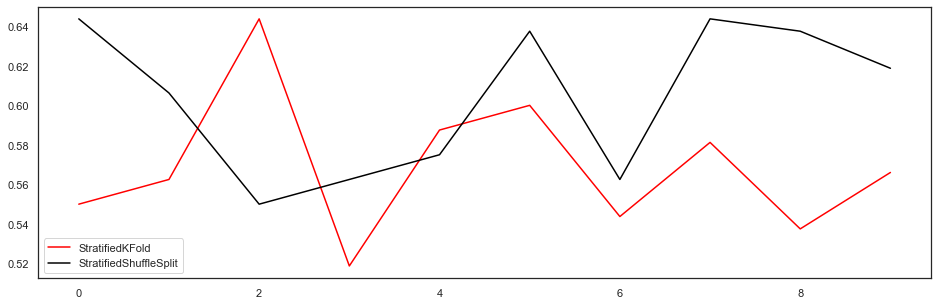

In [27]:



skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rs = StratifiedShuffleSplit(n_splits=10, random_state=42)

knn = KNeighborsClassifier(metric='manhattan')

scoreSkfold = cross_val_score(knn, Xnorm, Y1, cv=skfold)

scoreStratSSplit = cross_val_score(knn, Xnorm, Y1, cv=rs)


print("StratifiedKFold:")
print(scoreSkfold)
print("StratShuffleSplit:")
print(scoreStratSSplit)


plt.plot(scoreSkfold,color='red', label='StratifiedKFold')
plt.plot(scoreStratSSplit,color='black', label='StratifiedShuffleSplit')
plt.legend(loc='best');


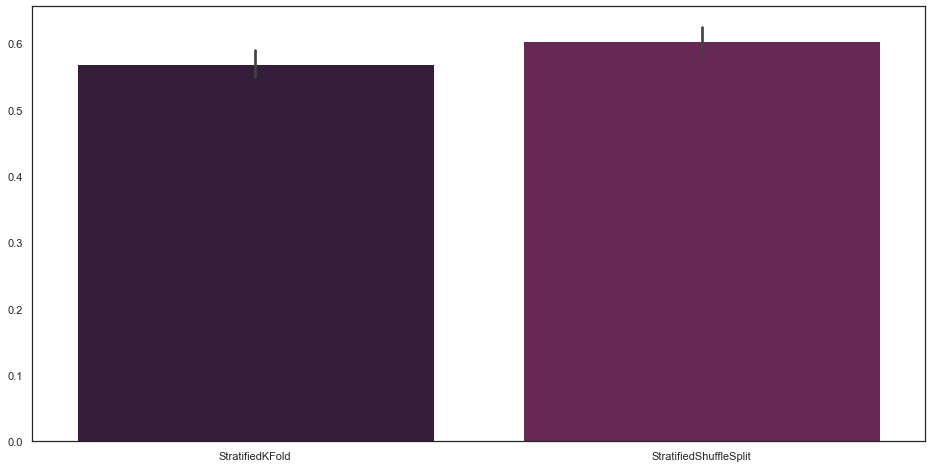

In [28]:
ScoresDF = pd.DataFrame({'StratifiedKFold':scoreSkfold,
                        'StratifiedShuffleSplit':scoreStratSSplit})
df_bar = ScoresDF.reset_index()
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=ScoresDF);

Podemos obvservar que StratifiedShuffleSplit nos entrega resultados un poco mejores.


## Run 3 sin Residual suggar

Se corre el mismo modelo, sin tener en cuenta el Residual suggar ya que es poco relevante.


In [29]:
X2=vinos.drop(['quality','residual sugar'],axis=1)
Y2=vinos['quality']

scaler = StandardScaler()
Xnorm = scaler.fit_transform(X2)

skf = StratifiedShuffleSplit(n_splits=10, random_state=42)
scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']


knn = KNeighborsClassifier(metric='manhattan')  

scores = cross_validate(knn, Xnorm, Y2, scoring=scoring, cv=skf, n_jobs=-1)

print("Mejor Precision: "+str(max(scores['test_precision_weighted']))+'\n')
print("Mejor Recall: "+str(max(scores['test_recall_weighted']))+'\n')
print("Mejor F1: "+str(max(scores['test_f1_weighted']))+'\n')

print("Precision Media: "+str(mean(scores['test_precision_weighted']))+'\n')
print("Recall Media: "+str(mean(scores['test_recall_weighted']))+'\n')
print("F1 Media: "+str(mean(scores['test_f1_weighted']))+'\n')

Mejor Precision: 0.6412555683880548

Mejor Recall: 0.65

Mejor F1: 0.6384126984126983

Precision Media: 0.5736136166584473

Recall Media: 0.5925

F1 Media: 0.5785321307289331



In [123]:
plt.plot(scores['test_precision_weighted'],color='blue', label='precision_weighted')
plt.plot(scores['test_f1_weighted'],color='red', label='f1_weighted')
plt.plot(scores['test_recall_weighted'],color='green', label='recall_weighted')

plt.legend(loc='best')

## Busqueda de los mejores parametros

Se realiza un grid search para buscar los mejores parametros del modelo

In [142]:
X2=vinos.drop(['quality','residual sugar'],axis=1)
Y2=vinos['quality']
train_x,test_x, train_y,test_y = train_test_split(Xnorm,Y2, test_size=0.2, random_state=42)

#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']
#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
knn = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(1,200, 2),
              'weights': ['uniform', 'distance'], 
              'leaf_size':np.arange(1, 10, 2),
              'algorithm':['auto', 'kd_tree','ball_tree','brute'],
              'metric':['manhattan','euclidean'],
              'p': np.arange(1, 10)}



model = GridSearchCV(estimator=knn,
                     param_grid=param_grid,
                     scoring='precision_weighted',
                     cv=9,
                     n_jobs=-1)

model.fit(train_x, train_y)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 179, 'p': 1, 'weights': 'distance'}
Mejor Score: 0.6843251279781082



Utilizaremos estos parametros encontrados en nuestro modelo

In [144]:
X2=vinos.drop(['quality','residual sugar'],axis=1)
Y2=vinos['quality']


skf = StratifiedShuffleSplit(n_splits=10, random_state=42)
scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']


knn = KNeighborsClassifier(algorithm= 'auto',
                           leaf_size= 1, 
                           metric= 'manhattan',
                           n_neighbors= 175,
                           weights= 'distance',
                           p = 1)  

scores = cross_validate(knn, Xnorm, Y2, scoring=scoring, cv=skf, n_jobs=-1)

print("Mejor Precision: "+str(max(scores['test_precision_weighted']))+'\n')
print("Mejor Recall: "+str(max(scores['test_recall_weighted']))+'\n')
print("Mejor F1: "+str(max(scores['test_f1_weighted']))+'\n')

print("Precision Media: "+str(mean(scores['test_precision_weighted']))+'\n')
print("Recall Media: "+str(mean(scores['test_recall_weighted']))+'\n')
print("F1 Media: "+str(mean(scores['test_f1_weighted']))+'\n')

Mejor Precision: 0.7345767575322812

Mejor Recall: 0.75625

Mejor F1: 0.7316363636363635

Precision Media: 0.6938139234378278

Recall Media: 0.71

F1 Media: 0.6850858909294028



In [128]:
mean(scores['test_precision_weighted'])
plt.plot(scores['test_precision_weighted'],color='blue', label='precision_weighted')
plt.plot(scores['test_f1_weighted'],color='red', label='f1_weighted')
plt.plot(scores['test_recall_weighted'],color='green', label='recall_weighted')
plt.legend(loc='best')